# Telco Churn Classification Project

## Project Overview

Go through the pipeline and create models that will predict whether a customer wil churn or not

## Project Goal

The goal is to create a model that will perform better then the baseline model and optimize recall

## Executive Summay

The following features were found to be main forces of churn
    Month to month contract
    Fiber optic
    Electronic Check
    Tenure
    
I chose the decision tree due to the following
    
    Baseline:
    
    Recall Rate:
    
    Accuracy: 
    

# Import

In [107]:
# Our essentials
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

#Acquire functions
from acquire import get_connection, new_telco_churn_data, get_telco_churn_data

#Prepare functions
from prepare import num_distributions, clean_telco_churn, telco_churn_split, prep_telco_churn

#Explore functions
from explore import get_obj_stats, countplot, get_churn_heatmap, get_metrics_binary

#sklearn to help us with our machine learning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

ModuleNotFoundError: No module named 'xgboost'

# Acquire 

In [2]:
#this acquire function will connect to codeup database, run a SQL query, & return telco_churn into a usable dataframe
#it will also create a .csv file in our directory.
df = get_telco_churn_data()

In [3]:
#seeing that it does look like how we would see it in SQL
df.head()

,payment_type_id,contract_type_id,internet_service_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,internet_service_type,contract_type,payment_type
0,2,1,3,0030-FNXPP,Female,0,No,No,3,Yes,...,No internet service,No internet service,No internet service,No,19.85,57.2,No,None,Month-to-month,Mailed check
1,2,1,3,0031-PVLZI,Female,0,Yes,Yes,4,Yes,...,No internet service,No internet service,No internet service,No,20.35,76.35,Yes,None,Month-to-month,Mailed check
2,1,1,3,0098-BOWSO,Male,0,No,No,27,Yes,...,No internet service,No internet service,No internet service,Yes,19.40,529.8,No,None,Month-to-month,Electronic check
3,1,1,3,0107-WESLM,Male,0,No,No,1,Yes,...,No internet service,No internet service,No internet service,Yes,19.85,19.85,Yes,None,Month-to-month,Electronic check
4,3,1,3,0114-RSRRW,Female,0,Yes,No,10,Yes,...,No internet service,No internet service,No internet service,Yes,19.95,187.75,No,None,Month-to-month,Bank transfer (automatic)


In [4]:
# check the datatypes
df.info()

# total charges had 11 missing values, those values were filled with the mean
# dummies were created and redundant columns were dropped
# There are a variety of Dtypes that need to be converted

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   contract_type_id          7043 non-null   int64  
 2   internet_service_type_id  7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

# Prepping the data

In [5]:
#clean_telco_churn will create dummies, convert data to correct types, resolve nulls, and drop redundant columns
df = clean_telco_churn(df)

In [6]:
#prep function will split this clean data into train, validate, and test sets.
train, validate, test = prep_telco_churn(df)

In [7]:
#making sure they have the same amount of columns, while decreasing rows.
train.shape, validate.shape, test.shape

((3943, 28), (1691, 28), (1409, 28))

In [8]:
# data is prepped and ready for exploration

# Exploration

<AxesSubplot:title={'center':'Features Correlated with Churn'}>

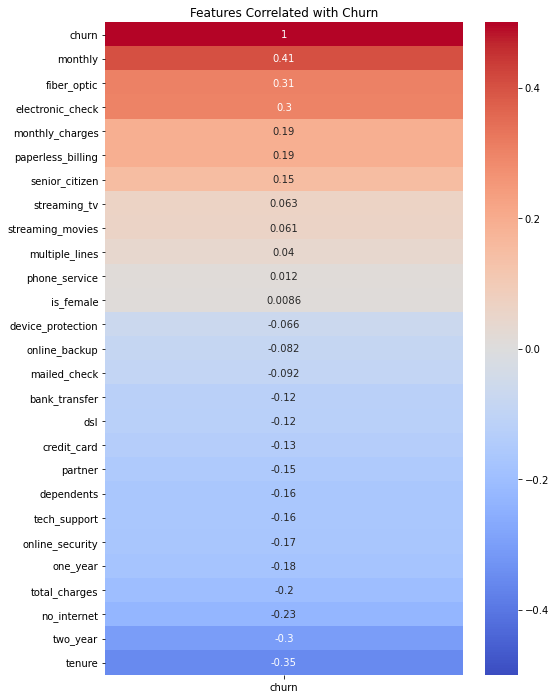

In [9]:
#Heatmaps will show us how much each feature is related to churn.
# -1 being strongest, negatively correlated
# +1 being strongest, positively correlated
get_churn_heatmap(df)



# Observations from heatmap

   # The top of the heat map reveal the most correlated to churn
       1.  monthly customers : .41
       2.  fiber optic: .31
       3.  electronic check: .30
       4.  monthly charges: .19
        
        
   # Bottom of heatmap reveal negative correlation
       1.  tenure: .35
       2.  two_year: .30
       

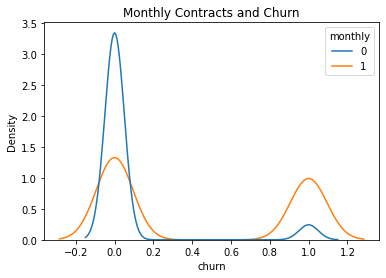

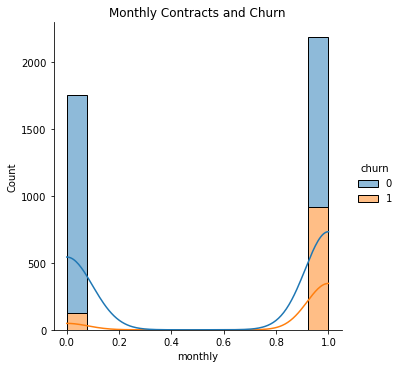

In [89]:
plt.subplots()
sns.kdeplot(data=df, hue='monthly' , x = 'churn') 
plt.title('Monthly Contracts and Churn')
plt.show()


sns.displot(train, x='monthly', hue = 'churn', multiple= 'stack', kde = True)
plt.title('Monthly Contracts and Churn')
plt.show()



Of those that churn, monthly contracts were those who churned the most

<ipython-input-11-d6b7ba3148b9>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
<ipython-input-11-d6b7ba3148b9>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])


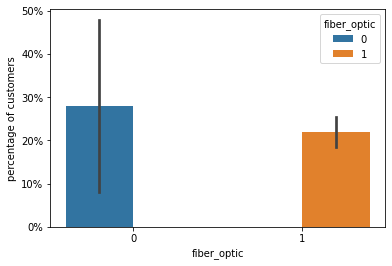

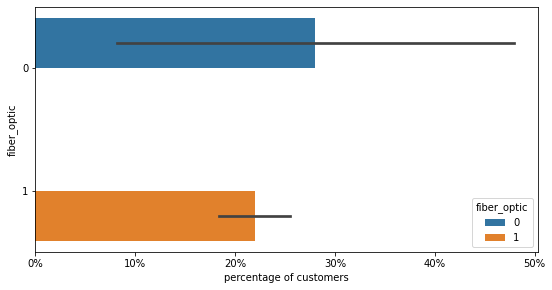

In [11]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df.groupby(feature)["churn"].value_counts().to_frame()
    g = g.rename({"churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='fiber_optic', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='fiber_optic', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("fiber_optic")

plt.figure(figsize=(9, 4.5))
barplot_percentages("fiber_optic", orient='h')


Those with fiber optic vs dsl or no internet have a higher percentage of churn. 

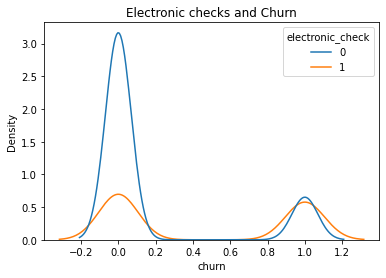

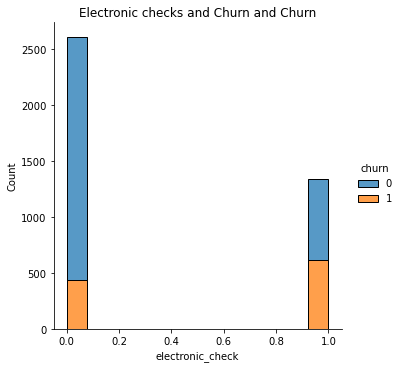

In [12]:
plt.subplots()
sns.kdeplot(data=df, hue='electronic_check' , x = 'churn') 
plt.title('Electronic checks and Churn')
plt.show()


sns.displot(train, x='electronic_check', hue = 'churn', multiple= 'stack')
plt.title('Electronic checks and Churn and Churn')
plt.show()

Electronic check users make up half of the churn of all payment types

Text(0.5, 1.0, 'Tenure (in months) and Churn')

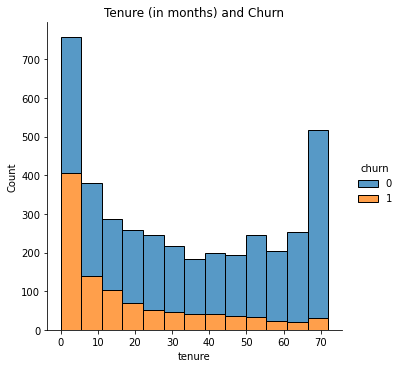

In [98]:
#last, visualize tenure (in months) and churn.
sns.displot(train, x="tenure",hue="churn", multiple='stack')
plt.title('Tenure (in months) and Churn')



The graph above shows that those who churn the most are less then 10 months into thier tenure

# Statistics

Hypothesis 1
    
    Ho: Monthly contracts are indpendent of churn

    Ha: Monthly contracts are not dependent of churn

In [14]:
#We are going to use a chi square test, because it compares two categorical variables.


null_hypothesis =  "Monthly contracts and churn are independent of each other."
alternative_hypothesis =  "Monthly contracts and churn are not independent of each other."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.monthly, train.churn, margins = True)
observed

churn,0,1,All
monthly,,,
0,1628,127,1755
1,1269,919,2188
All,2897,1046,3943


In [15]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1628  127 1755]
 [1269  919 2188]
 [2897 1046 3943]]
---
Expected

[[1289.43317271  465.56682729 1755.        ]
 [1607.56682729  580.43317271 2188.        ]
 [2897.         1046.         3943.        ]]
---

chi^2 = 603.8993
p     = 0.0000


In [16]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: Monthly contracts and churn are independent of each other.
There is evidence to suggest: Monthly contracts and churn are not independent of each other.


### Takeaway

    Possibly sensitive to the price at first
    
    We observed 919 month to month customer churned when we expected 580 people churned
    
    

# Hypothesis 2

    Ho: People who have fiber optic are independent of churn

    Ha: People who have fiber optic are dependent on churn

In [17]:
null_hypothesis = "fiber optic customers are independent of churn."
alternative_hypothesis = "fiber optic customers are dependent of churn."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.fiber_optic, train.churn, margins = True)
observed

churn,0,1,All
fiber_optic,,,
0,1858,304,2162
1,1039,742,1781
All,2897,1046,3943


In [18]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
p

2.5087626354447297e-81

In [19]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[1858  304 2162]
 [1039  742 1781]
 [2897 1046 3943]]
---
Expected

[[1588.46411362  573.53588638 2162.        ]
 [1308.53588638  472.46411362 1781.        ]
 [2897.         1046.         3943.        ]]
---

chi^2 = 381.6926
p     = 0.0000


In [20]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: fiber optic customers are independent of churn.
There is evidence to suggest: fiber optic customers are dependent of churn.


### Takeaway 

    Fiber optic more then likely of all the internet types to churn
    
    We expected 472 people to churn however we observed 742.

# Hypothesis 3
    
    Ho: People who pay with electronic check are inpendent of churn

    Ha: People who pay with electronic check are dependent on churn

In [21]:
null_hypothesis = "People who pay with electronic check are independent of churn."
alternative_hypothesis = "People who pay with electronic check are dependent on churn."
a = 0.05 #a for alpha 

observed = pd.crosstab(train.electronic_check, train.churn, margins = True)
observed

churn,0,1,All
electronic_check,,,
0,2173,434,2607
1,724,612,1336
All,2897,1046,3943


In [22]:
chi2, p, degf, expected = stats.chi2_contingency(observed)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected.astype(int))
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[2173  434 2607]
 [ 724  612 1336]
 [2897 1046 3943]]
---
Expected

[[1915  691 2607]
 [ 981  354 1336]
 [2897 1046 3943]]
---

chi^2 = 385.3859
p     = 0.0000


In [23]:
if p < a:
    print(f'Reject null hypothesis that: {null_hypothesis}')
    print (f'There is evidence to suggest: {alternative_hypothesis}')
else:
    print(f'Fail to reject null hypothesis that: {null_hypothesis} There is not sufficient evidence to reject it.')

Reject null hypothesis that: People who pay with electronic check are independent of churn.
There is evidence to suggest: People who pay with electronic check are dependent on churn.


### Takeaway

    People that paid with the electronic check were more likely to churn
    
    We expected 354 to churn however we observed 612

# Modeling

### Steps before modeling
    
    1.Our priority measure will be recall
        
        a.Our focus is on rataining customers instead of those who have already decided to leave
        
    2. Deciding a model: choose the one with the best recall and least overfit

In [24]:
def get_metrics_binary(clf):
    '''
    get_metrics_binary takes in a confusion matrix (cnf) for a binary classifier and prints out metrics based on
    values in variables named X_train, y_train, and y_pred.
    
    return: a classification report as a transposed DataFrame
    '''
    accuracy = clf.score(X_train, y_train)
    class_report = pd.DataFrame(classification_report(y_train, y_pred, output_dict=True)).T
    conf = confusion_matrix(y_train, y_pred)
    tpr = conf[1][1] / conf[1].sum()
    fpr = conf[0][1] / conf[0].sum()
    tnr = conf[0][0] / conf[0].sum()
    fnr = conf[1][0] / conf[1].sum()
    print(f'''
    The accuracy for our model is {accuracy:.4}
    The True Positive Rate is {tpr:.3}, The False Positive Rate is {fpr:.3},
    The True Negative Rate is {tnr:.3}, and the False Negative Rate is {fnr:.3}
    ''')
    return class_report

In [26]:
#x_cols are the features 
#y_col is our target
x_col = ['fiber_optic', 'electronic_check','tenure', 'two_year', 'monthly']
y_col = 'churn'

In [27]:
#splitting based on our features
X_train, y_train = train[x_col], train[y_col]

X_validate, y_validate = validate[x_col], validate[y_col]

X_test, y_test = test[x_col], test[y_col]

In [28]:
y_train.value_counts()

0    2897
1    1046
Name: churn, dtype: int64

In [29]:
#Since I can see most customers stayed, I will set my churn prediction to 0 for everyone. 
train['baseline_prediction'] = 0
round(accuracy_score(train.churn, train.baseline_prediction),2)

0.73

In [30]:
baseline_score = round(accuracy_score(train.churn, train.baseline_prediction),2)
print(f'Our baseline score is {baseline_score}')

Our baseline score is 0.73


### Predictions end up 4 different ways:

True Positive. We predicted the customer would stay & they did.

True Negative. We predicted the customer would leave & they did.

False Positive. We predicted the customer would stay & they didn't.

False Negative. We predicted the customer would leave & they didn't.

# Decision Tree Model 

In [41]:
#Going to create a decision tree under 'tree', I used max leaf nodes of 15 and max depth of 5. 
tree = DecisionTreeClassifier(max_leaf_nodes=15, max_depth=5)

In [42]:
#fit it to my training sample
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15)

In [43]:
#training and validate score, I want them to be better than the baseline and close to each other so I'm not overfitting
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')

training score: 79.99%
validate score: 78.30%


In [46]:
# make prediction on train observations
y_pred = tree.predict(X_train)
y_pred[0:5]

array([0, 0, 0, 0, 0])

In [47]:
# function prints a classification report 

get_metrics_binary(tree)


    The accuracy for our model is 0.7999
    The True Positive Rate is 0.472, The False Positive Rate is 0.0818,
    The True Negative Rate is 0.918, and the False Negative Rate is 0.528
    


,precision,recall,f1-score,support
0,0.828144,0.918191,0.870846,2897.000000
1,0.675787,0.472275,0.555993,1046.000000
accuracy,0.799899,0.799899,0.799899,0.799899
macro avg,0.751966,0.695233,0.713420,3943.000000
weighted avg,0.787727,0.799899,0.787322,3943.000000


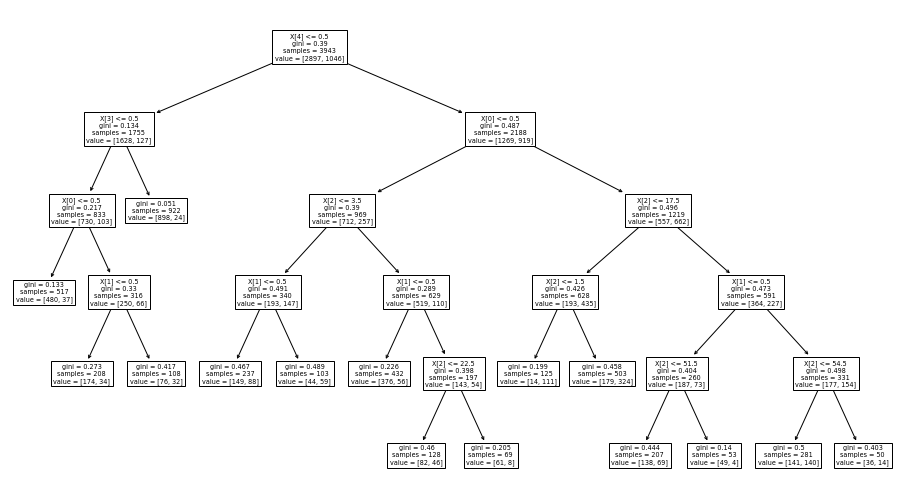

In [48]:
#illustration of the tree
plt.figure(figsize=(16,9))
plot_tree(tree)
plt.show()

In [49]:
#making a prediction for churn, and also a classification report.
y_pred = tree.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2897
           1       0.68      0.47      0.56      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.70      0.71      3943
weighted avg       0.79      0.80      0.79      3943



In [51]:
print('Scores for Decision Tree')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for Decision Tree
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.92


In [52]:
# Accuracy is better then our baseline by 7 percentage points

# KNN

In [58]:
#setting up and fitting my KNN model.  
knn = KNeighborsClassifier(n_neighbors = 5, )
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [59]:
#let's see the training and validate scores
print(f'training score: {knn.score(X_train, y_train):.2%}')
print(f'validate score: {knn.score(X_validate, y_validate):.2%}')

training score: 79.69%
validate score: 76.23%


In [60]:
#classification report
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      2897
           1       0.68      0.47      0.56      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.70      0.71      3943
weighted avg       0.79      0.80      0.79      3943



In [61]:
get_metrics_binary(knn)


    The accuracy for our model is 0.7969
    The True Positive Rate is 0.472, The False Positive Rate is 0.0818,
    The True Negative Rate is 0.918, and the False Negative Rate is 0.528
    


,precision,recall,f1-score,support
0,0.828144,0.918191,0.870846,2897.000000
1,0.675787,0.472275,0.555993,1046.000000
accuracy,0.799899,0.799899,0.799899,0.799899
macro avg,0.751966,0.695233,0.713420,3943.000000
weighted avg,0.787727,0.799899,0.787322,3943.000000


In [63]:
print('Scores for KNN')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for KNN
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.92


# Logistic Regression 

In [64]:
logit = LogisticRegression(C= 10, random_state =123)
logit.fit(X_train, y_train)
y_pred = logit.predict(X_train)
print(f'training score: {logit.score(X_train, y_train):.2%}')
print(f'validate score: {logit.score(X_validate, y_validate):.2%}')

training score: 79.61%
validate score: 78.89%


In [65]:
#classification report.
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87      2897
           1       0.65      0.50      0.57      1046

    accuracy                           0.80      3943
   macro avg       0.74      0.70      0.72      3943
weighted avg       0.78      0.80      0.79      3943



In [66]:
get_metrics_binary(logit)


    The accuracy for our model is 0.7961
    The True Positive Rate is 0.5, The False Positive Rate is 0.097,
    The True Negative Rate is 0.903, and the False Negative Rate is 0.5
    


,precision,recall,f1-score,support
0,0.833386,0.903003,0.866799,2897.000000
1,0.650498,0.500000,0.565405,1046.000000
accuracy,0.796094,0.796094,0.796094,0.796094
macro avg,0.741942,0.701502,0.716102,3943.000000
weighted avg,0.784870,0.796094,0.786845,3943.000000


In [104]:
print('Scores for Logistic Regression!')
print('---------------------------')
print(f'Baseline score is {baseline_score}')
print(f'accuracy score is {round(sklearn.metrics.accuracy_score(y_train, y_pred),2)}')
print(f'precision score is {round(sklearn.metrics.precision_score(y_train, y_pred, pos_label =0),2)}')
print(f'recall score is {round(sklearn.metrics.recall_score(y_train, y_pred, pos_label =0),2)}')

Scores for Logistic Regression!
---------------------------
Baseline score is 0.73
accuracy score is 0.8
precision score is 0.83
recall score is 0.9


# Test 

    - Recall for decision tree stands to have the best recall percentage with 92%
    
    - Training and Validate are within 2% of eachother so there is no overfit issue.

In [105]:
#the actual results and the predicted results to make a classification report
real_test = y_test
predicted_test = tree.predict(X_test)
print(classification_report(real_test, predicted_test))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.44      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.80      0.78      1409



In [106]:
#let's see the training, validate, and test score. All better than the baseline of 73.4%
print(f'training score: {tree.score(X_train, y_train):.2%}')
print(f'validate score: {tree.score(X_validate, y_validate):.2%}')
print(f'test score: {tree.score(X_test, y_test):.2%}')

training score: 79.99%
validate score: 78.30%
test score: 79.63%


# Prediction 

In [70]:
test.head()

,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
3960,2592-HODOV,0,0,0,13,1,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
2131,7426-GSWPO,1,0,0,64,1,1,1,1,0,...,0,1,0,1,0,0,1,0,0,0
5313,9378-FXTIZ,0,1,0,54,1,1,0,0,0,...,1,0,0,0,1,0,0,1,0,0
4295,1017-FBQMM,0,1,1,62,1,1,0,1,0,...,0,1,0,0,1,0,0,1,0,0
772,1193-RTSLK,0,0,0,38,1,0,1,1,1,...,0,1,0,1,0,0,0,1,0,0


In [71]:
features = ['fiber_optic', 'electronic_check','tenure', 'two_year', 'monthly']

In [72]:
#my decision tree's probabilities
proba_test = tree.predict_proba(X_test)

In [74]:
#turning my probabilities into a dataframe 
proba_df = pd.DataFrame(proba_test, columns=tree.classes_.tolist())
proba_df.head()

,0,1
0,0.928433,0.071567
1,0.924528,0.075472
2,0.928433,0.071567
3,0.836538,0.163462
4,0.666667,0.333333


In [75]:
#reset the index
reset_test = test.reset_index()
reset_test.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,dsl,fiber_optic,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,0,0,1,0,1,0,0,1,0,0
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,0,1,0,1,0,0,1,0,0,0
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,0,1,0,0,1,0,0,1,0,0
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,0,1,0,1,0,0,0,1,0,0


In [76]:
#concatenate 
test_proba_df = pd.concat([reset_test, proba_df], axis=1)
test_proba_df.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,no_internet,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,0,1
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,1,0,1,0,0,1,0,0,0.928433,0.071567
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,0,1,0,0,1,0,0,0,0.924528,0.075472
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,0,0,1,0,0,1,0,0,0.928433,0.071567
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,0,0,1,0,0,1,0,0,0.836538,0.163462
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,0,1,0,0,0,1,0,0,0.666667,0.333333


In [77]:
#adding my predicted result column
test_proba_df['predicted'] = predicted_test
test_proba_df.head()

,index,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,monthly,one_year,two_year,bank_transfer,credit_card,electronic_check,mailed_check,0,1,predicted
0,3960,2592-HODOV,0,0,0,13,1,0,0,0,...,0,1,0,0,1,0,0,0.928433,0.071567,0
1,2131,7426-GSWPO,1,0,0,64,1,1,1,1,...,1,0,0,1,0,0,0,0.924528,0.075472,0
2,5313,9378-FXTIZ,0,1,0,54,1,1,0,0,...,0,1,0,0,1,0,0,0.928433,0.071567,0
3,4295,1017-FBQMM,0,1,1,62,1,1,0,1,...,0,1,0,0,1,0,0,0.836538,0.163462,0
4,772,1193-RTSLK,0,0,0,38,1,0,1,1,...,1,0,0,0,1,0,0,0.666667,0.333333,0


In [78]:
#only keeping the relevant columns
telco_prediction = test_proba_df[['customer_id', 0,1, 'predicted']]
telco_prediction.tail()

,customer_id,0,1,predicted
1404,1731-TVIUK,0.355865,0.644135,1
1405,4628-WQCQQ,0.703704,0.296296,0
1406,5887-IKKYO,0.973970,0.026030,0
1407,4931-TRZWN,0.640625,0.359375,0
1408,1396-QWFBJ,0.666667,0.333333,0


In [79]:
#to a csv it goes
telco_prediction.to_csv('telco_predictions.csv')